## Notebook for testing essential Audio I/O utilities

Date: 11/04/2021

In [1]:
%matplotlib inline
from IPython.display import display, Audio, HTML   
import numpy as np
import matplotlib.pyplot as plt

import librosa
try:
  import google.colab
  IN_COLAB = True
  ! pip install pydub  ! pip install git+https://github.com/compi1234/AuditoryDemonstrations.git
except:
  IN_COLAB = False

import ad_utils.audio_utils as audio

## 1. Read from file

In [5]:
# You can load a file from url or from local disk, more details in the manpage
# help(audio.load)

(619982,) 22050


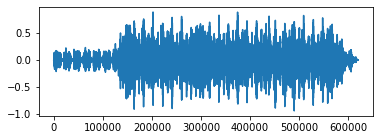

In [3]:
wavname = 'https://homes.esat.kuleuven.be/~spchlab/data/13dB/Psnger22.wav'
# wavname = 'train.wav'
# the normal call load()  overwrites the soundfile default of always_2d and returns a 2D array
wavdata,sample_rate= audio.load(wavname)
# 
print(wavdata.shape, sample_rate)
fig = plt.figure(figsize=(6,2))
plt.plot(wavdata)
# if you want the plot above the audio widget, add line below
# plt.show()
Audio(data=wavdata,rate=sample_rate,autoplay=False)

In [ ]:
# you can convert at time of loading:
# -> sample_rate or convert from multichannel to mono

(619982,) 22050


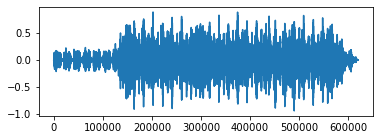

In [6]:
wavname = 'https://homes.esat.kuleuven.be/~spchlab/data/13dB/Psnger22.wav'
# and can specify a new sampling rate when reading in the data or convert multi to mono
print(wavdata.shape, sample_rate)
fig = plt.figure(figsize=(6,2))
plt.plot(wavdata)
Audio(data=wavdata,rate=sample_rate,autoplay=False)

## 2. Record from device

In [7]:
help(audio.record)

Help on function record in module ad_utils.audio_utils:

record(seconds=2.0, sample_rate=16000, n_channels=1, io_device='sd')
    Parameters
    ----------
        seconds : float
            number of seconds to record (default=2.0)
        sample_rate : int
            sampling rate (default=16000)
        n_channels : int
            number of channels to record (default=1)
        io_device : string
            device from which to record (default='sd')
            currently supporting 'sd' or 'browser'
            
    Returns
    -------
        wavdata : float-32 array, shape (n_sample,_) or (n_channels, n_samples)
            the waveform data scaled to [-1., 1.]



In [8]:
# you can set sampling rate and number of channels to be recorded
sample_rate=16000
wavdata = audio.record(2.,sample_rate,n_channels=2)
print(wavdata.shape)
Audio(data=wavdata,rate=sample_rate)

recording started for 2.00 seconds on 2 channel(s)
recording finished
(2, 32000)


## 3. Multichannel plot and play

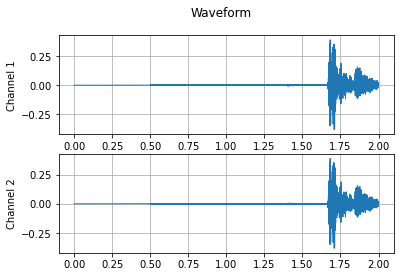

In [9]:
audio.plot_waveform(wavdata,sample_rate)

In [10]:
# just play the (stereo) waveform
# if you want multiple sequential plays, then you must wait for each of them to finish
# before starting the next one
audio.play(wavdata,wait=True)
# select a channel from a 
audio.play(wavdata,channels=[0])
# or render an display object
audio.play(wavdata,io_device='browser')